In [ ]:
# Install a pip package via the current Jupyter kernel
import sys
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install SimpleITK
!{sys.executable} -m pip install numpy #==1.16.4 #to prevent error: ModuleNotFoundErrot: No module named 'numpy.testing.decorators
!{sys.executable} -m pip install scikit-image
!{sys.executable} -m pip install sklearn
!{sys.executable} -m pip install tqdm
!{sys.executable} -m pip install keras_tqdm
!{sys.executable} -m pip install tensorflow

In [1]:
from datetime import datetime

from src.models.train_model import train_u_net
from src.data.data_loader import VerseDataset

In [2]:
BASE_PATH_NORMALIZED = 'data/processed/normalized-images'

# generate training and validation data
verse_dataset = VerseDataset(base_path=BASE_PATH_NORMALIZED, shape=(128, 64, 64), seed=2020, split=0.8)

In [3]:
batch_size = 1
epochs = 1
steps_per_epoch = 5

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 128, 64, 64) 0                                            
__________________________________________________________________________________________________
tf_op_layer_ExpandDims (TensorF [(None, 128, 64, 64, 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv3d (Conv3D)                 (None, 128, 64, 64,  224         tf_op_layer_ExpandDims[0][0]     
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 128, 64, 64,  32          conv3d[0][0]                     
______________________________________________________________________________________________

training on: verse207.mha
yields: verse207.mha
training on: verse014.mha
yields: verse014.mha
training on: verse226.mha
2/5 [===========>..................] - ETA: 25s - loss: 5.6232 - mean_squared_error: 0.2846 yields: verse226.mha
training on: verse254.mha
3/5 [=================>............] - ETA: 42s - loss: 5.4365 - mean_squared_error: 0.2815yields: verse254.mha
training on: verse255.mha
4/5 [=======================>......] - ETA: 23s - loss: 5.2575 - mean_squared_error: 0.2791yields: verse255.mha
training on: verse261.mha
validating on: verse214.mha
validating on: verse152.mha

Epoch 00001: val_loss improved from inf to 4.07535, saving model to models/temp/model_01-4.08.h5


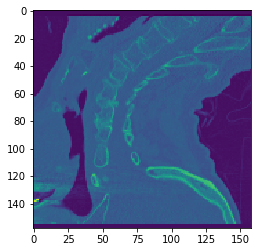

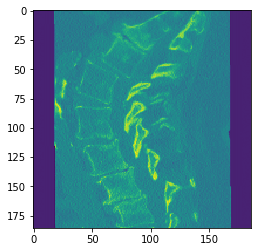

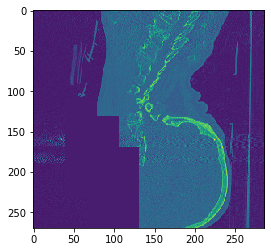

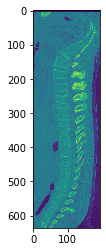

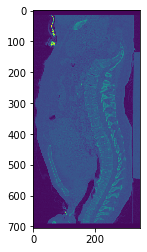

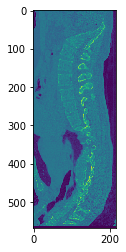

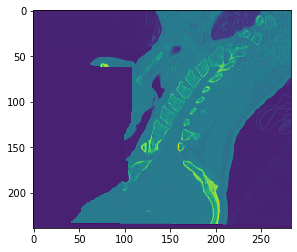

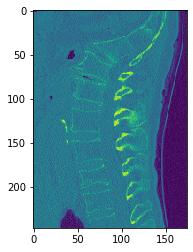

<Figure size 432x288 with 0 Axes>

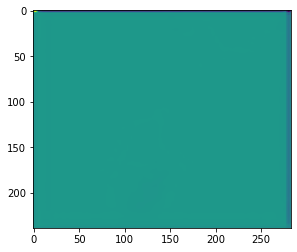

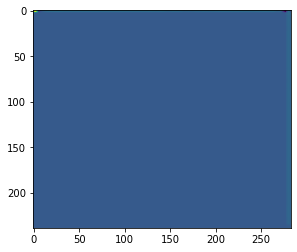

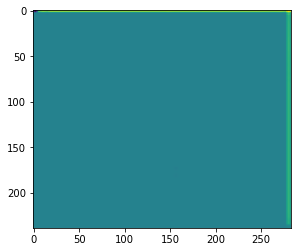

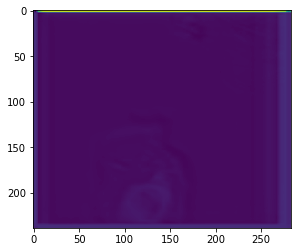

yields: verse261.mha


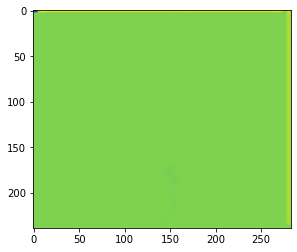

training on: verse072.mha


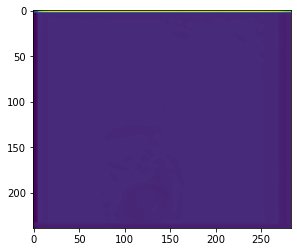

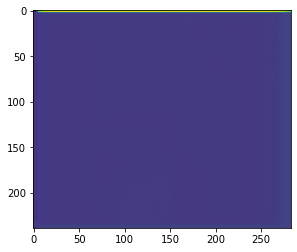

C:\Users\Casper\Documents\DS1920\ISMI\git3\ismi-1920-VerSe-team-4\src\data\data_loader.py:93: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


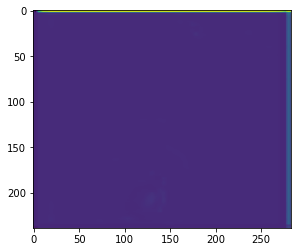

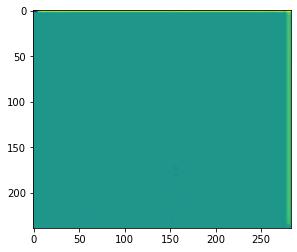

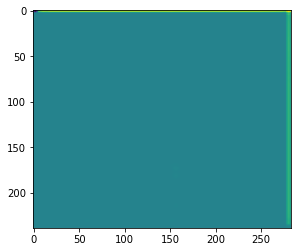

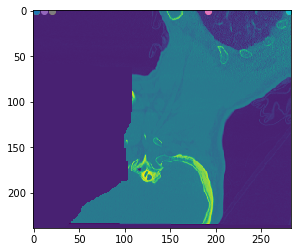

yields: verse072.mha
training on: verse061.mha


<Figure size 432x288 with 0 Axes>

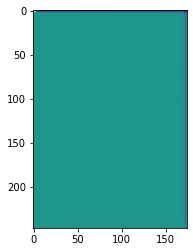

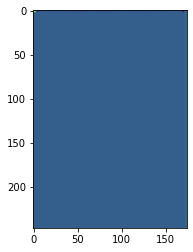

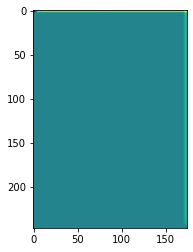

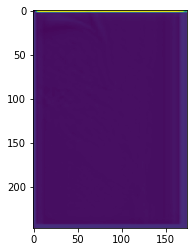

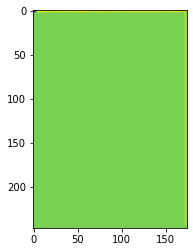

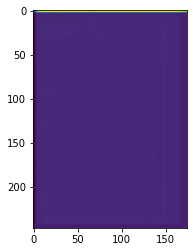

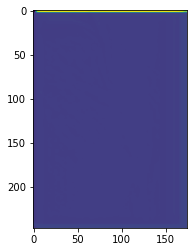

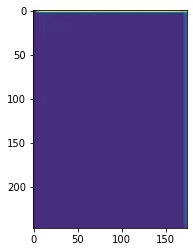

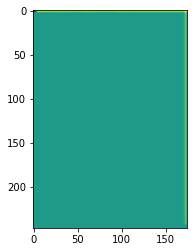

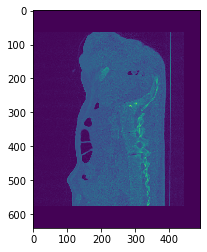

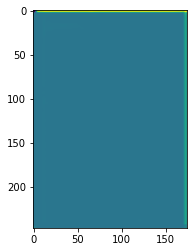

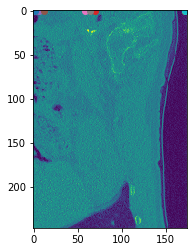

<Figure size 432x288 with 0 Axes>

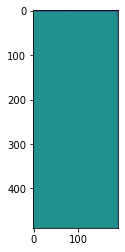

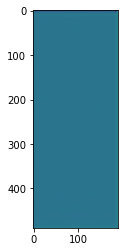

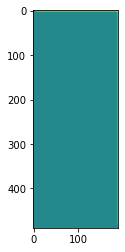

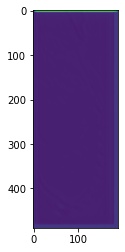

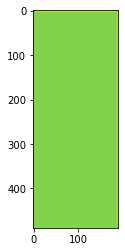

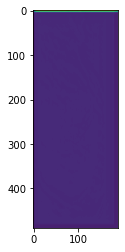

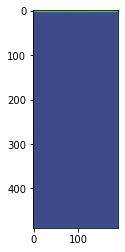

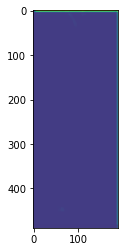

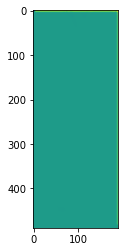

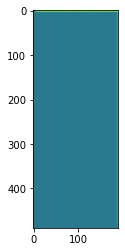

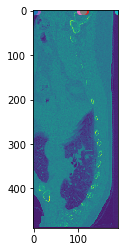

yields: verse061.mha
training on: verse243.mha
yields: verse243.mha
training on: verse223.mha


<Figure size 432x288 with 0 Axes>

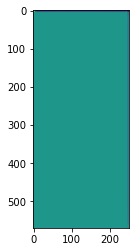

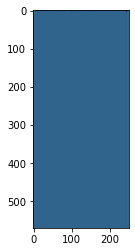

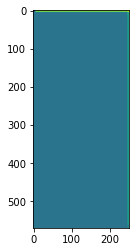

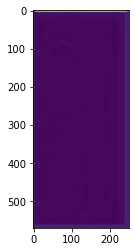

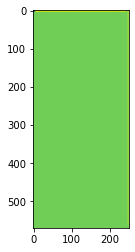

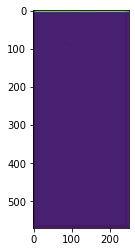

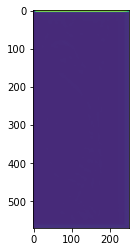

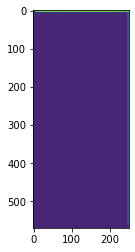

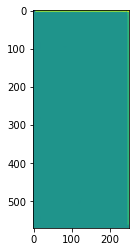

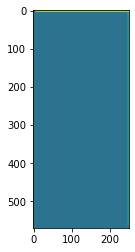

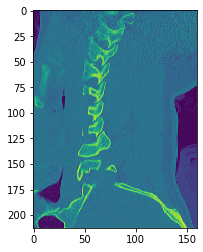

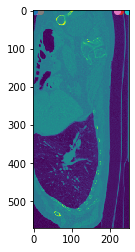

yields: verse223.mha
training on: verse215.mha
yields: verse215.mha
training on: verse065.mha
yields: verse065.mha
training on: verse075.mha


<Figure size 432x288 with 0 Axes>

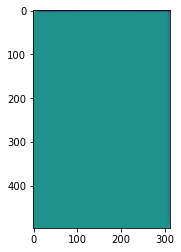

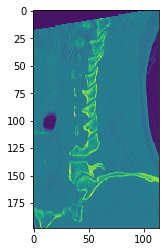

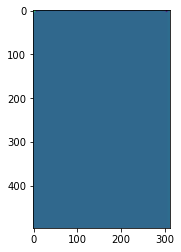

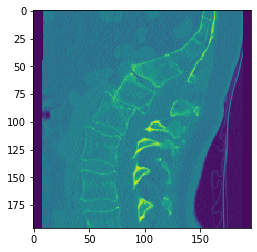

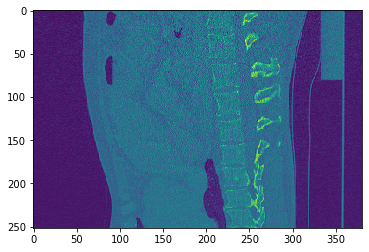

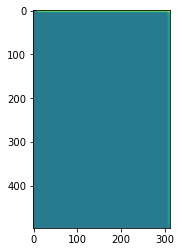

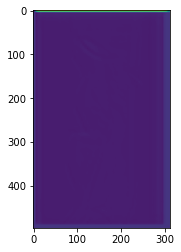

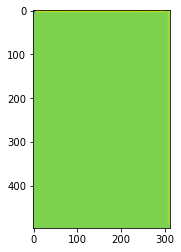

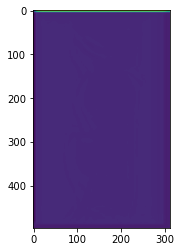

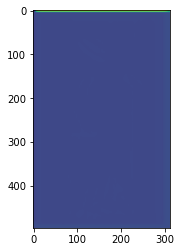

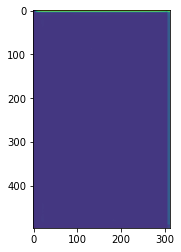

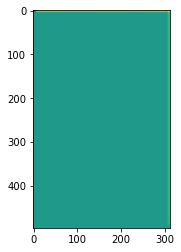

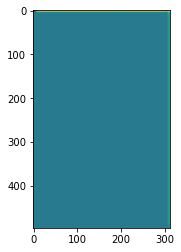

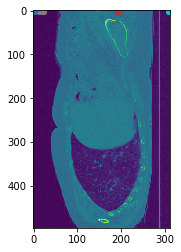

<Figure size 432x288 with 0 Axes>

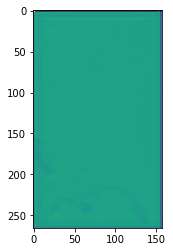

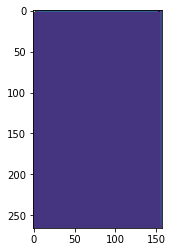

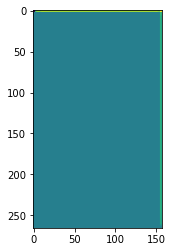

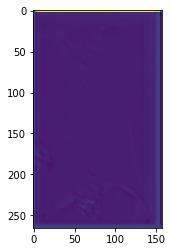

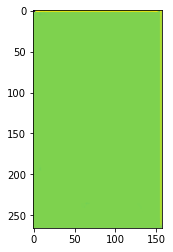

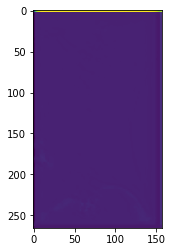

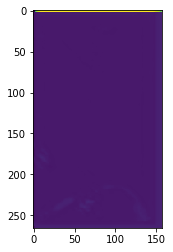

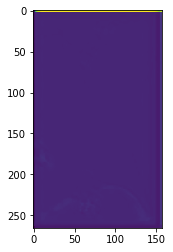

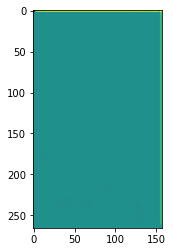

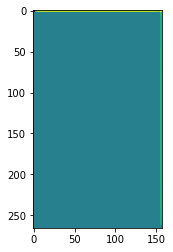

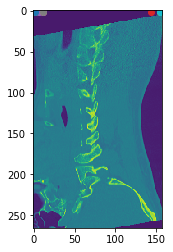

yields: verse075.mha


<Figure size 432x288 with 0 Axes>

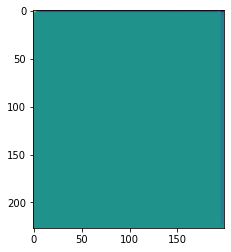

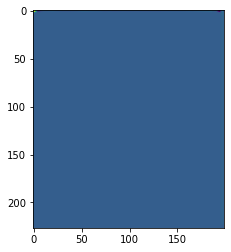

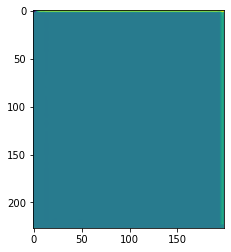

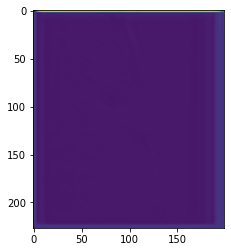

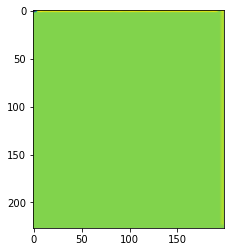

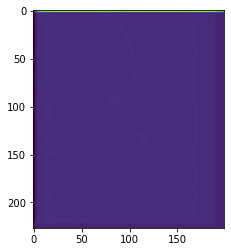

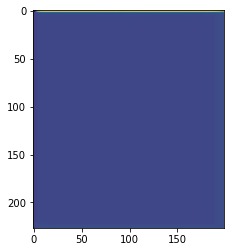

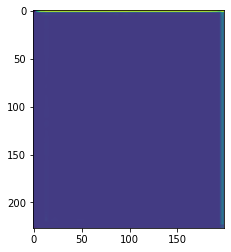

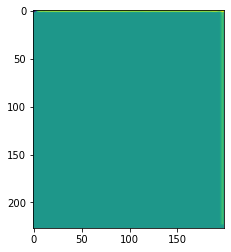

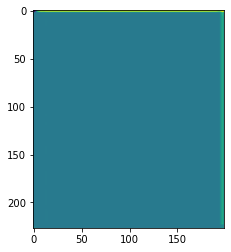

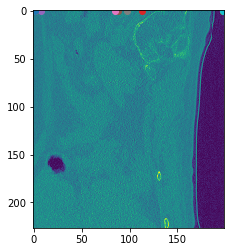

<Figure size 432x288 with 0 Axes>

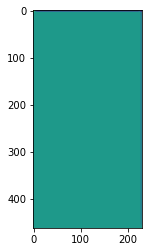

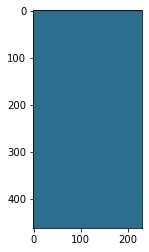

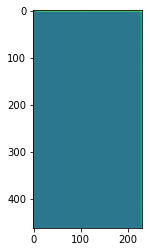

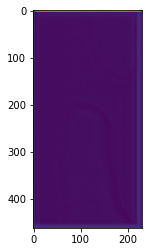

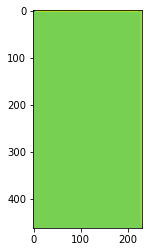

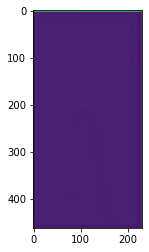

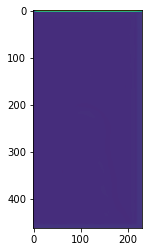

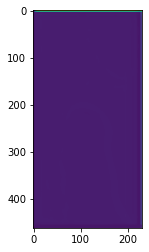

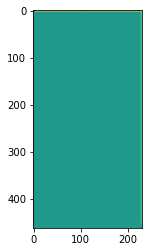

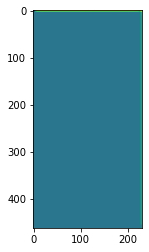

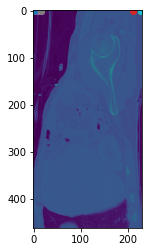

<Figure size 432x288 with 0 Axes>

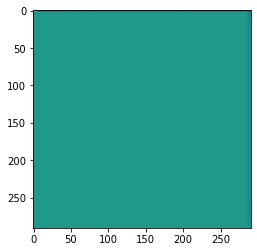

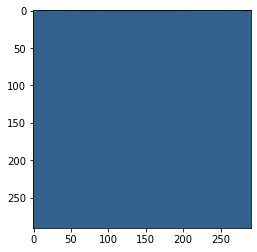

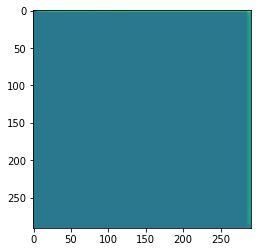

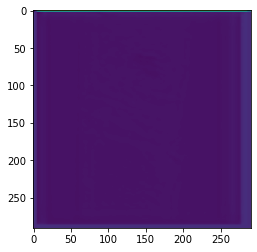

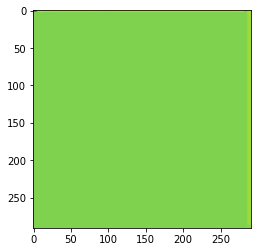

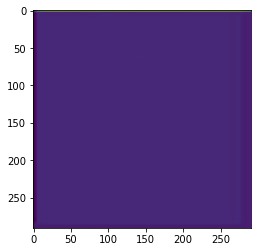

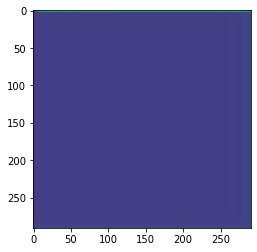

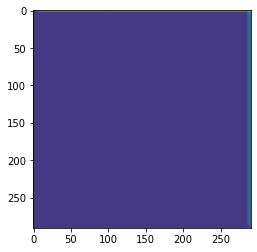

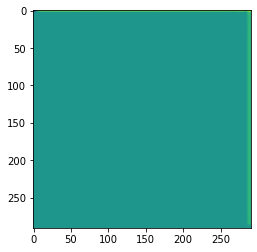

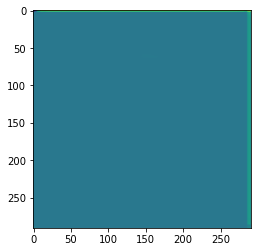

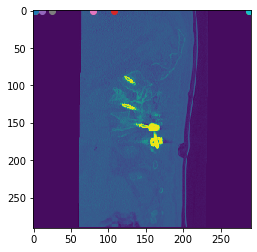

<Figure size 432x288 with 0 Axes>

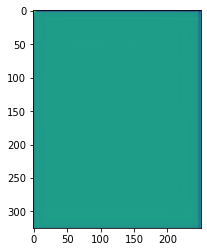

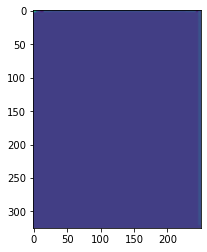

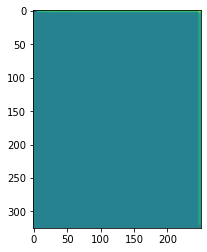

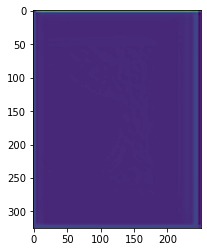

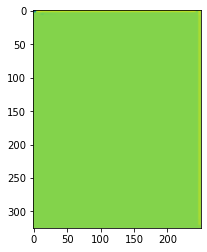

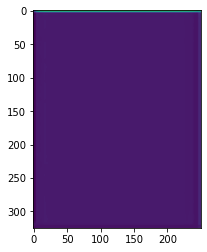

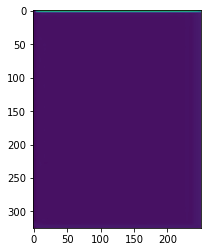

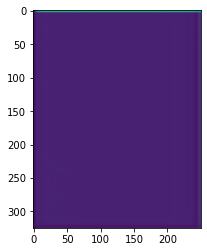

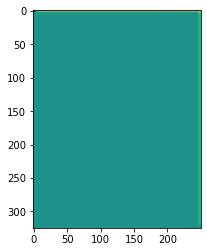

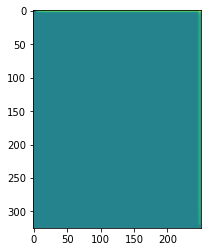

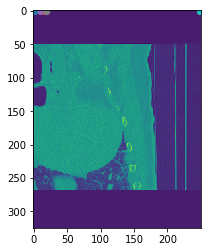

In [ ]:
training_dataset = verse_dataset.get_dataset('train').batch(batch_size)
validation_dataset = verse_dataset.get_dataset('validation').batch(batch_size)
# current implementation of validation_generator contains a bottleneck of 2 samples

trained_model3 = train_u_net(training_dataset, validation_dataset, epochs, steps_per_epoch, verse_dataset.validation)